# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

668

In [3]:
#checking cities list
print (cities)

['ushuaia', 'puerto ayora', 'anar darreh', 'tuktoyaktuk', 'east london', 'poum', 'saint-augustin', 'dingle', 'yaan', 'stokmarknes', 'puerto escondido', 'hackettstown', 'busselton', 'hermanus', 'new norfolk', 'north branch', 'nanortalik', 'lorengau', 'stephenville', 'leningradskiy', 'roquetas de mar', 'aykhal', 'albany', 'hobart', 'punta arenas', 'warri', 'haines junction', 'port alfred', 'rikitea', 'carnarvon', 'clyde river', 'jibuti', 'ukiah', 'nueva loja', 'atuona', 'dong hoi', 'cantaura', 'saint george', 'hualmay', 'padang', 'ponta do sol', 'olavarria', 'maku', 'burnie', 'severo-kurilsk', 'touros', 'mizdah', 'pangoa', 'avarua', 'belushya guba', 'kaitangata', 'yellowknife', 'san vicente', 'vaini', 'la ronge', 'mataura', 'teodoro sampaio', 'barrow', 'butaritari', 'biak', 'kapaa', 'mamallapuram', 'ribeira grande', 'rungata', 'noyabrsk', 'te anau', 'san patricio', 'bara', 'omboue', 'bluff', 'mys shmidta', 'verkhnyaya inta', 'naze', 'grand centre', 'taoudenni', 'paracuru', 'samusu', 'hit

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#setting up url for calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#setting up lists 
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#set counter
y = 0

#print initial line
print ('Beginning Data Retrieval')
print ('-----------------------------')

#loop through cities making api call
for city in cities:
    
    try:
        #make api call
        response = requests.get(query_url + city).json()
        
        #gather data
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        #increase counter by one
        y = y+1
    
        #print
        print (f'Processing Record {y} | {city}')
    
    except:
        print ('City not found. Skipping')




Beginning Data Retrieval
-----------------------------
Processing Record 1 | ushuaia
Processing Record 2 | puerto ayora
City not found. Skipping
Processing Record 3 | tuktoyaktuk
Processing Record 4 | east london
Processing Record 5 | poum
Processing Record 6 | saint-augustin
Processing Record 7 | dingle
Processing Record 8 | yaan
Processing Record 9 | stokmarknes
Processing Record 10 | puerto escondido
Processing Record 11 | hackettstown
Processing Record 12 | busselton
Processing Record 13 | hermanus
Processing Record 14 | new norfolk
Processing Record 15 | north branch
Processing Record 16 | nanortalik
Processing Record 17 | lorengau
Processing Record 18 | stephenville
Processing Record 19 | leningradskiy
Processing Record 20 | roquetas de mar
Processing Record 21 | aykhal
Processing Record 22 | albany
Processing Record 23 | hobart
Processing Record 24 | punta arenas
Processing Record 25 | warri
Processing Record 26 | haines junction
Processing Record 27 | port alfred
Processing Rec

Processing Record 230 | chemal
Processing Record 231 | koratagere
Processing Record 232 | akyab
City not found. Skipping
Processing Record 233 | marmande
Processing Record 234 | moshupa
Processing Record 235 | sola
Processing Record 236 | necochea
Processing Record 237 | banda aceh
Processing Record 238 | ketchikan
Processing Record 239 | moa
Processing Record 240 | adrar
Processing Record 241 | baft
Processing Record 242 | vila franca do campo
Processing Record 243 | gwanda
Processing Record 244 | cooma
Processing Record 245 | berezovka
Processing Record 246 | vardo
Processing Record 247 | coquimbo
Processing Record 248 | pitimbu
Processing Record 249 | kaabong
Processing Record 250 | zeya
Processing Record 251 | huarmey
Processing Record 252 | redmond
Processing Record 253 | sao gabriel da cachoeira
Processing Record 254 | otorohanga
Processing Record 255 | kyzyl-suu
Processing Record 256 | ahuimanu
Processing Record 257 | mezen
Processing Record 258 | huanren
Processing Record 259 |

Processing Record 462 | madimba
City not found. Skipping
City not found. Skipping
Processing Record 463 | santa lucia
Processing Record 464 | hirara
Processing Record 465 | batagay-alyta
Processing Record 466 | bubaque
Processing Record 467 | san jeronimito
Processing Record 468 | maniwaki
Processing Record 469 | ilulissat
Processing Record 470 | port-gentil
Processing Record 471 | ponta delgada
Processing Record 472 | igrim
Processing Record 473 | salekhard
Processing Record 474 | vila velha
Processing Record 475 | constitucion
Processing Record 476 | bosaso
City not found. Skipping
Processing Record 477 | bima
Processing Record 478 | celestun
Processing Record 479 | damietta
Processing Record 480 | wajima
Processing Record 481 | pangnirtung
Processing Record 482 | san cristobal
Processing Record 483 | sorland
Processing Record 484 | dalvik
Processing Record 485 | anadyr
City not found. Skipping
Processing Record 486 | rawson
Processing Record 487 | chokurdakh
Processing Record 488 | 

In [5]:
#testing/viewing data pull
print (city_name)
print (lat)
print (lng)
print (max_temp)
print (humidity)
print (cloudiness)
print (wind_speed)
print (country)
print (date)

['Ushuaia', 'Puerto Ayora', 'Tuktoyaktuk', 'East London', 'Poum', 'Saint-Augustin', 'Dingle', 'Yaan', 'Stokmarknes', 'Puerto Escondido', 'Hackettstown', 'Busselton', 'Hermanus', 'New Norfolk', 'North Branch', 'Nanortalik', 'Lorengau', 'Stephenville', 'Leningradskiy', 'Roquetas de Mar', 'Aykhal', 'Albany', 'Hobart', 'Punta Arenas', 'Warri', 'Haines Junction', 'Port Alfred', 'Rikitea', 'Carnarvon', 'Clyde River', 'Djibouti', 'Ukiah', 'Nueva Loja', 'Atuona', 'Kwang Binh', 'Cantaura', 'Saint George', 'Hualmay', 'Padang', 'Ponta do Sol', 'Olavarría', 'Maku', 'Burnie', "Severo-Kuril'sk", 'Touros', 'Mizdah', 'Pangoa', 'Avarua', 'Kaitangata', 'Yellowknife', 'San Vicente', 'Vaini', 'La Ronge', 'Mataura', 'Teodoro Sampaio', 'Barrow', 'Butaritari', 'Biak', 'Kapaa', 'Mahabalipuram', 'Ribeira Grande', 'Noyabrsk', 'Te Anau', 'San Patricio', 'Bara', 'Omboué', 'Bluff', 'Verkhnyaya Inta', 'Naze', 'Taoudenni', 'Paracuru', 'Hithadhoo', 'Qui Nhon', 'Cabedelo', 'Isangel', 'Bouza', 'Ambilobe', 'Laas', 'Soui

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create dictionary for data frame
data_dict = {
    'City' : city_name,
    'Latitude' : lat,
    'Longitude' : lng,
    'Max Temp' : max_temp,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date' : date
}

#create data frame
cities_df = pd.DataFrame(data_dict)

#export csv
cities_df.to_csv('output_data/cities_data.csv')

#display head of data frame
cities_df.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,42.46,87,75,10.36,AR,1632186512
1,Puerto Ayora,-0.7393,-90.3518,68.09,83,40,10.40,EC,1632186596
2,Tuktoyaktuk,69.4541,-133.0374,39.20,87,90,16.11,CA,1632186708
3,East London,-33.0153,27.9116,57.63,55,9,25.72,ZA,1632186708
4,Poum,-20.2333,164.0167,72.70,64,16,20.18,NC,1632186709


In [7]:
cities_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,6.080000e+02
mean,19.659940,15.922863,64.104342,69.671053,53.345395,8.816645,1.632187e+09
std,33.638125,90.315388,16.791018,20.710454,40.908534,5.998867,8.555582e+01
min,-54.800000,-175.200000,13.460000,9.000000,0.000000,0.000000,1.632186e+09
25%,-9.221400,-62.132800,51.682500,60.000000,8.000000,4.060000,1.632187e+09
50%,22.180350,18.880550,67.275000,75.000000,58.500000,7.740000,1.632187e+09
75%,48.432975,91.956425,78.135000,84.000000,98.000000,12.660000,1.632187e+09
max,78.218600,179.316700,99.050000,100.000000,100.000000,34.990000,1.632187e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# -------there was no humidity over 100%---------

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

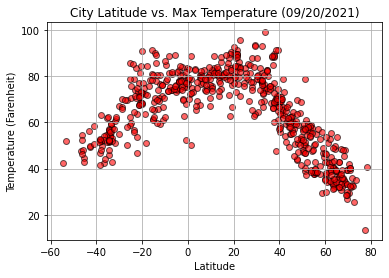

In [22]:
#set up scatter plot data
plt.scatter(cities_df["Latitude"], cities_df["Max Temp"], marker="o", color='red', edgecolors='black', alpha=.6)

#format styling
plt.title("City Latitude vs. Max Temperature (09/20/2021)")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("images/lat_vs_temp.png")

#show plot
plt.show()

Overall temperatures are highest between latitude -20 and 20. The further in each direction each hemisphere goes from latitude 0 the lower the max temperature gets. 

## Latitude vs. Humidity Plot

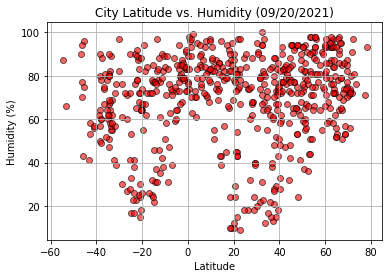

In [47]:
#set up scatter plot data
plt.scatter(cities_df["Latitude"], cities_df["Humidity"], marker="o", color='red', edgecolors='black', alpha=.6)

#format styling
plt.title("City Latitude vs. Humidity (09/20/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("images/lat_vs_humidity.png")

#show plot
plt.show()

The lowest humidities seem to occur arround the latitudes -20 and 20 to 40.

## Latitude vs. Cloudiness Plot

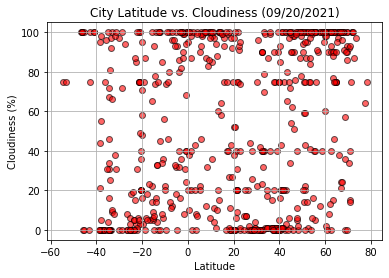

In [48]:
#set up scatter plot data
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"], marker="o", color='red', edgecolors='black', alpha=.6)

#format styling
plt.title("City Latitude vs. Cloudiness (09/20/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("images/lat_vs_cloudiness.png")

#show plot
plt.show()

Cloudiness doesn't seem to correlate with latitude

## Latitude vs. Wind Speed Plot

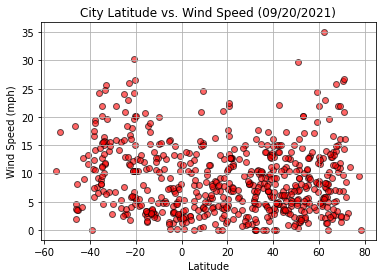

In [49]:
#set up scatter plot data
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed"], marker="o", color='red', edgecolors='black', alpha=.6)

#format styling
plt.title("City Latitude vs. Wind Speed (09/20/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("images/lat_vs_wind.png")

#show plot
plt.show()

Wind speed doesn't seem to correlate with latitude

## Linear Regression

In [26]:
#create northern hemisphere data frame
north_df = cities_df.loc[cities_df["Latitude"] >= 0]

#view data frame
north_df.head(10)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Tuktoyaktuk,69.4541,-133.0374,39.20,87,90,16.11,CA,1632186708
5,Saint-Augustin,51.2260,-58.6502,50.04,60,22,11.52,CA,1632186709
6,Dingle,10.9995,122.6711,80.40,84,100,2.86,PH,1632186709
7,Yaan,7.3833,8.5667,74.17,93,100,6.08,NG,1632186710
8,Stokmarknes,68.5646,14.9108,48.18,57,0,21.85,NO,1632186710
9,Puerto Escondido,15.8500,-97.0667,81.43,57,75,0.00,MX,1632186711
10,Hackettstown,40.8540,-74.8291,69.66,72,43,3.44,US,1632186711
14,North Branch,45.5113,-92.9802,62.67,94,62,11.18,US,1632186713
15,Nanortalik,60.1432,-45.2371,37.33,71,2,12.97,GL,1632186713
17,Stephenville,32.2207,-98.2023,93.20,31,40,4.61,US,1632186714


In [27]:
#create southern hemisphere data frame
south_df = cities_df.loc[cities_df["Latitude"] < 0]

#view data frame
south_df.head(10)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,42.46,87,75,10.36,AR,1632186512
1,Puerto Ayora,-0.7393,-90.3518,68.09,83,40,10.40,EC,1632186596
3,East London,-33.0153,27.9116,57.63,55,9,25.72,ZA,1632186708
4,Poum,-20.2333,164.0167,72.70,64,16,20.18,NC,1632186709
11,Busselton,-33.6500,115.3333,59.20,55,0,11.59,AU,1632186711
12,Hermanus,-34.4187,19.2345,51.69,67,34,6.91,ZA,1632186712
13,New Norfolk,-42.7826,147.0587,49.50,58,100,8.93,AU,1632186712
16,Lorengau,-2.0226,147.2712,80.69,79,99,4.99,PG,1632186713
22,Hobart,-42.8794,147.3294,49.86,53,75,12.66,AU,1632186453
23,Punta Arenas,-53.1500,-70.9167,51.91,66,75,17.27,CL,1632186716


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

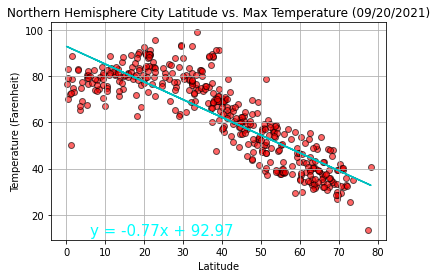

The r-value is: 0.7131318492553445


In [67]:
#calculate linear regression and line
(slope, intercept, rvalue, _, _) = linregress(north_df["Latitude"], north_df["Max Temp"])
regress_values = north_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set up scatter plot
plt.scatter(north_df["Latitude"], north_df["Max Temp"], marker="o", color='red', edgecolors='black', alpha=.6)
plt.plot(north_df["Latitude"],regress_values,"c-")

#format styling
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (09/20/2021)")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(6,11),fontsize=15,color="cyan")

#save image
plt.savefig("images/north_lat_vs_temp.png")

#show plot and print r value
plt.show()
print (f'The r-value is: {rvalue**2}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

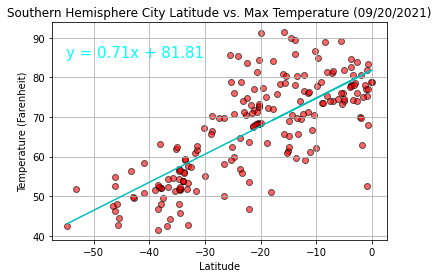

The r-value is 0.575805431425782


In [42]:
#calculate linear regression and line
(slope, intercept, rvalue, _, _) = linregress(south_df["Latitude"], south_df["Max Temp"])
regress_values = south_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set up scatter plot
plt.scatter(south_df["Latitude"], south_df["Max Temp"], marker="o", color='red', edgecolors='black', alpha=.6)
plt.plot(south_df["Latitude"],regress_values,"c-")

#format styling
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (09/20/2021)")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-55,85),fontsize=15,color="cyan")

#save image
plt.savefig("images/south_lat_vs_temp.png")

#show plot and print r value
plt.show()
print (f'The r-value is {rvalue**2}')

There is a strong correlation between lattitude and temperature for both the southern and northern hemispheres.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

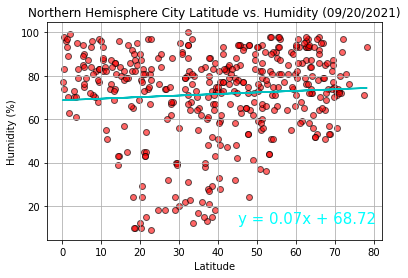

The r-value is: 0.00490423500015452


In [55]:
#calculate linear regression and line
(slope, intercept, rvalue, _, _) = linregress(north_df["Latitude"], north_df["Humidity"])
regress_values = north_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set up scatter plot
plt.scatter(north_df["Latitude"], north_df["Humidity"], marker="o", color='red', edgecolors='black', alpha=.6)
plt.plot(north_df["Latitude"],regress_values,"c-")

#format styling
plt.title("Northern Hemisphere City Latitude vs. Humidity (09/20/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(45,12),fontsize=15,color="cyan")

#save image
plt.savefig("images/north_lat_vs_humidity.png")

#show plot and print r value
plt.show()
print (f'The r-value is: {rvalue**2}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

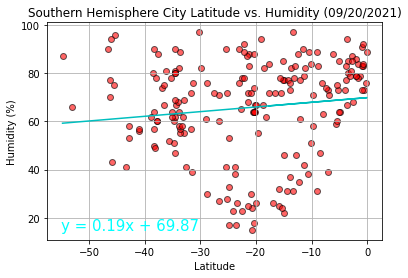

The r-value is: 0.016072661388705868


In [59]:
#calculate linear regression and line
(slope, intercept, rvalue, _, _) = linregress(south_df["Latitude"], south_df["Humidity"])
regress_values = south_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set up scatter plot
plt.scatter(south_df["Latitude"], south_df["Humidity"], marker="o", color='red', edgecolors='black', alpha=.6)
plt.plot(south_df["Latitude"],regress_values,"c-")

#format styling
plt.title("Southern Hemisphere City Latitude vs. Humidity (09/20/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-55,15),fontsize=15,color="cyan")

#save image
plt.savefig("images/south_lat_vs_humidity.png")

#show plot and print r value
plt.show()
print (f'The r-value is: {rvalue**2}')

There is a very weak correlation between lattitude and humidity for both the southern and northern hemispheres.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

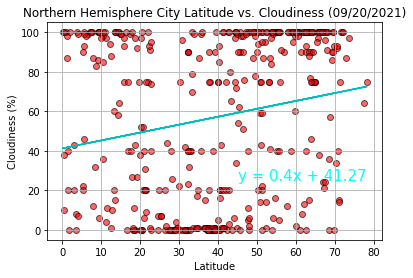

The r-value is: 0.03867200365616791


In [61]:
#calculate linear regression and line
(slope, intercept, rvalue, _, _) = linregress(north_df["Latitude"], north_df["Cloudiness"])
regress_values = north_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set up scatter plot
plt.scatter(north_df["Latitude"], north_df["Cloudiness"], marker="o", color='red', edgecolors='black', alpha=.6)
plt.plot(north_df["Latitude"],regress_values,"c-")

#format styling
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (09/20/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(45,25),fontsize=15,color="cyan")

#save image
plt.savefig("images/north_lat_vs_cloudiness.png")

#show plot and print r value
plt.show()
print (f'The r-value is: {rvalue**2}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

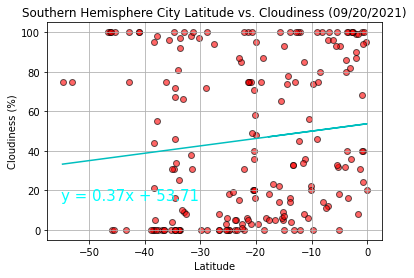

The r-value is: 0.015579279113691008


In [62]:
#calculate linear regression and line
(slope, intercept, rvalue, _, _) = linregress(south_df["Latitude"], south_df["Cloudiness"])
regress_values = south_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set up scatter plot
plt.scatter(south_df["Latitude"], south_df["Cloudiness"], marker="o", color='red', edgecolors='black', alpha=.6)
plt.plot(south_df["Latitude"],regress_values,"c-")

#format styling
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (09/20/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-55,15),fontsize=15,color="cyan")

#save image
plt.savefig("images/south_lat_vs_cloudiness.png")

#show plot and print r value
plt.show()
print (f'The r-value is: {rvalue**2}')

There is a very weak correlation between lattitude and cloudiness for both the southern and northern hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

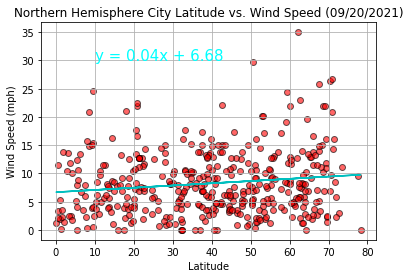

The r-value is: 0.019814402532429633


In [64]:
#calculate linear regression and line
(slope, intercept, rvalue, _, _) = linregress(north_df["Latitude"], north_df["Wind Speed"])
regress_values = north_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set up scatter plot
plt.scatter(north_df["Latitude"], north_df["Wind Speed"], marker="o", color='red', edgecolors='black', alpha=.6)
plt.plot(north_df["Latitude"],regress_values,"c-")

#format styling
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (09/20/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(10,30),fontsize=15,color="cyan")

#save image
plt.savefig("images/north_lat_vs_wind.png")

#show plot and print r value
plt.show()
print (f'The r-value is: {rvalue**2}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

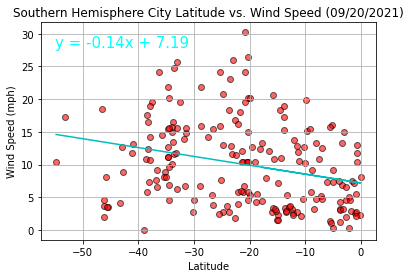

The r-value is: 0.07631280500692196


In [66]:
#calculate linear regression and line
(slope, intercept, rvalue, _, _) = linregress(south_df["Latitude"], south_df["Wind Speed"])
regress_values = south_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set up scatter plot
plt.scatter(south_df["Latitude"], south_df["Wind Speed"], marker="o", color='red', edgecolors='black', alpha=.6)
plt.plot(south_df["Latitude"],regress_values,"c-")

#format styling
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (09/20/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-55,28),fontsize=15,color="cyan")

#save image
plt.savefig("images/south_lat_vs_wind.png")

#show plot and print r value
plt.show()
print (f'The r-value is: {rvalue**2}')

There is a very weak correlation between lattitude and wind speed for both the southern and northern hemispheres. The southern r-value is almost 4 times higher though.